In [1]:
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ['DejaVu Serif']
plt.rcParams['font.size'] = 12

In [5]:
def plot_steps(data, data_augmented, data2):
    plt.figure(figsize=(10,8), dpi=300)
                    
    plt.subplot(1,3,1)
    plt.imshow(data, cmap='RdGy')
    plt.title("Train sample")
    plt.axis("off")
    
    plt.subplot(1,3,2)
    plt.imshow(data_augmented, cmap='gray')
    plt.title("Train sample label")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.title("Train sample prediction")
    plt.imshow(data2, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()

def data_standardization(data):

    mean = np.mean(data)
    std_dev = np.std(data)
    data = (data - mean) / std_dev # standardization
    
    data = np.clip(data, -3, 3) # Clip the outliers

    min_val = np.min(data)
    max_val = np.max(data)

    data = 2 * (data - min_val) / (max_val - min_val) - 1

    return data

class SaltAndPepper(A.ImageOnlyTransform):
    def __init__(self, prob=0.01, always_apply=False, p=0.5):
        super(SaltAndPepper, self).__init__(always_apply, p)
        self.prob = prob

    def apply(self, img, **params):
        noisy = img.copy()
        num_salt = np.ceil(self.prob * img.size * 0.5)
        num_pepper = np.ceil(self.prob * img.size * 0.5)

        # salt (branco)
        coords = [np.random.randint(0, i - 1, int(num_salt))
                  for i in img.shape[:2]]
        noisy[coords[0], coords[1]] = np.max(noisy)

        # pepper (preto)
        coords = [np.random.randint(0, i - 1, int(num_pepper))
                  for i in img.shape[:2]]
        noisy[coords[0], coords[1]] = np.min(noisy)

        return noisy
        
'''
def apply_augmentation(sample):
    transform = A.Compose([
        A.ColorJitter(p=0.4),
        A.GaussianBlur(p=0.4),
        A.RandomBrightnessContrast(p=0.4),
        SaltAndPepper(p=0.5),
        A.CoarseDropout(max_holes=60, max_height=0.03, max_width=0.03, fill_value=0, p=0.4)
    ])
    return transform(image=sample)['image']
'''

def apply_augmentation(sample):
    transform = A.Compose([
        A.CoarseDropout(max_holes=10, max_height=0.10, max_width=0.10, fill_value=0, p=1),
        A.CoarseDropout(max_holes=500, max_height=0.02, max_width=0.02, fill_value=0, p=1),
        A.CoarseDropout(max_holes=25, max_height=0.002, max_width=0.02, fill_value=1, p=1)
    ])
    return transform(image=sample)['image']

## Augmented

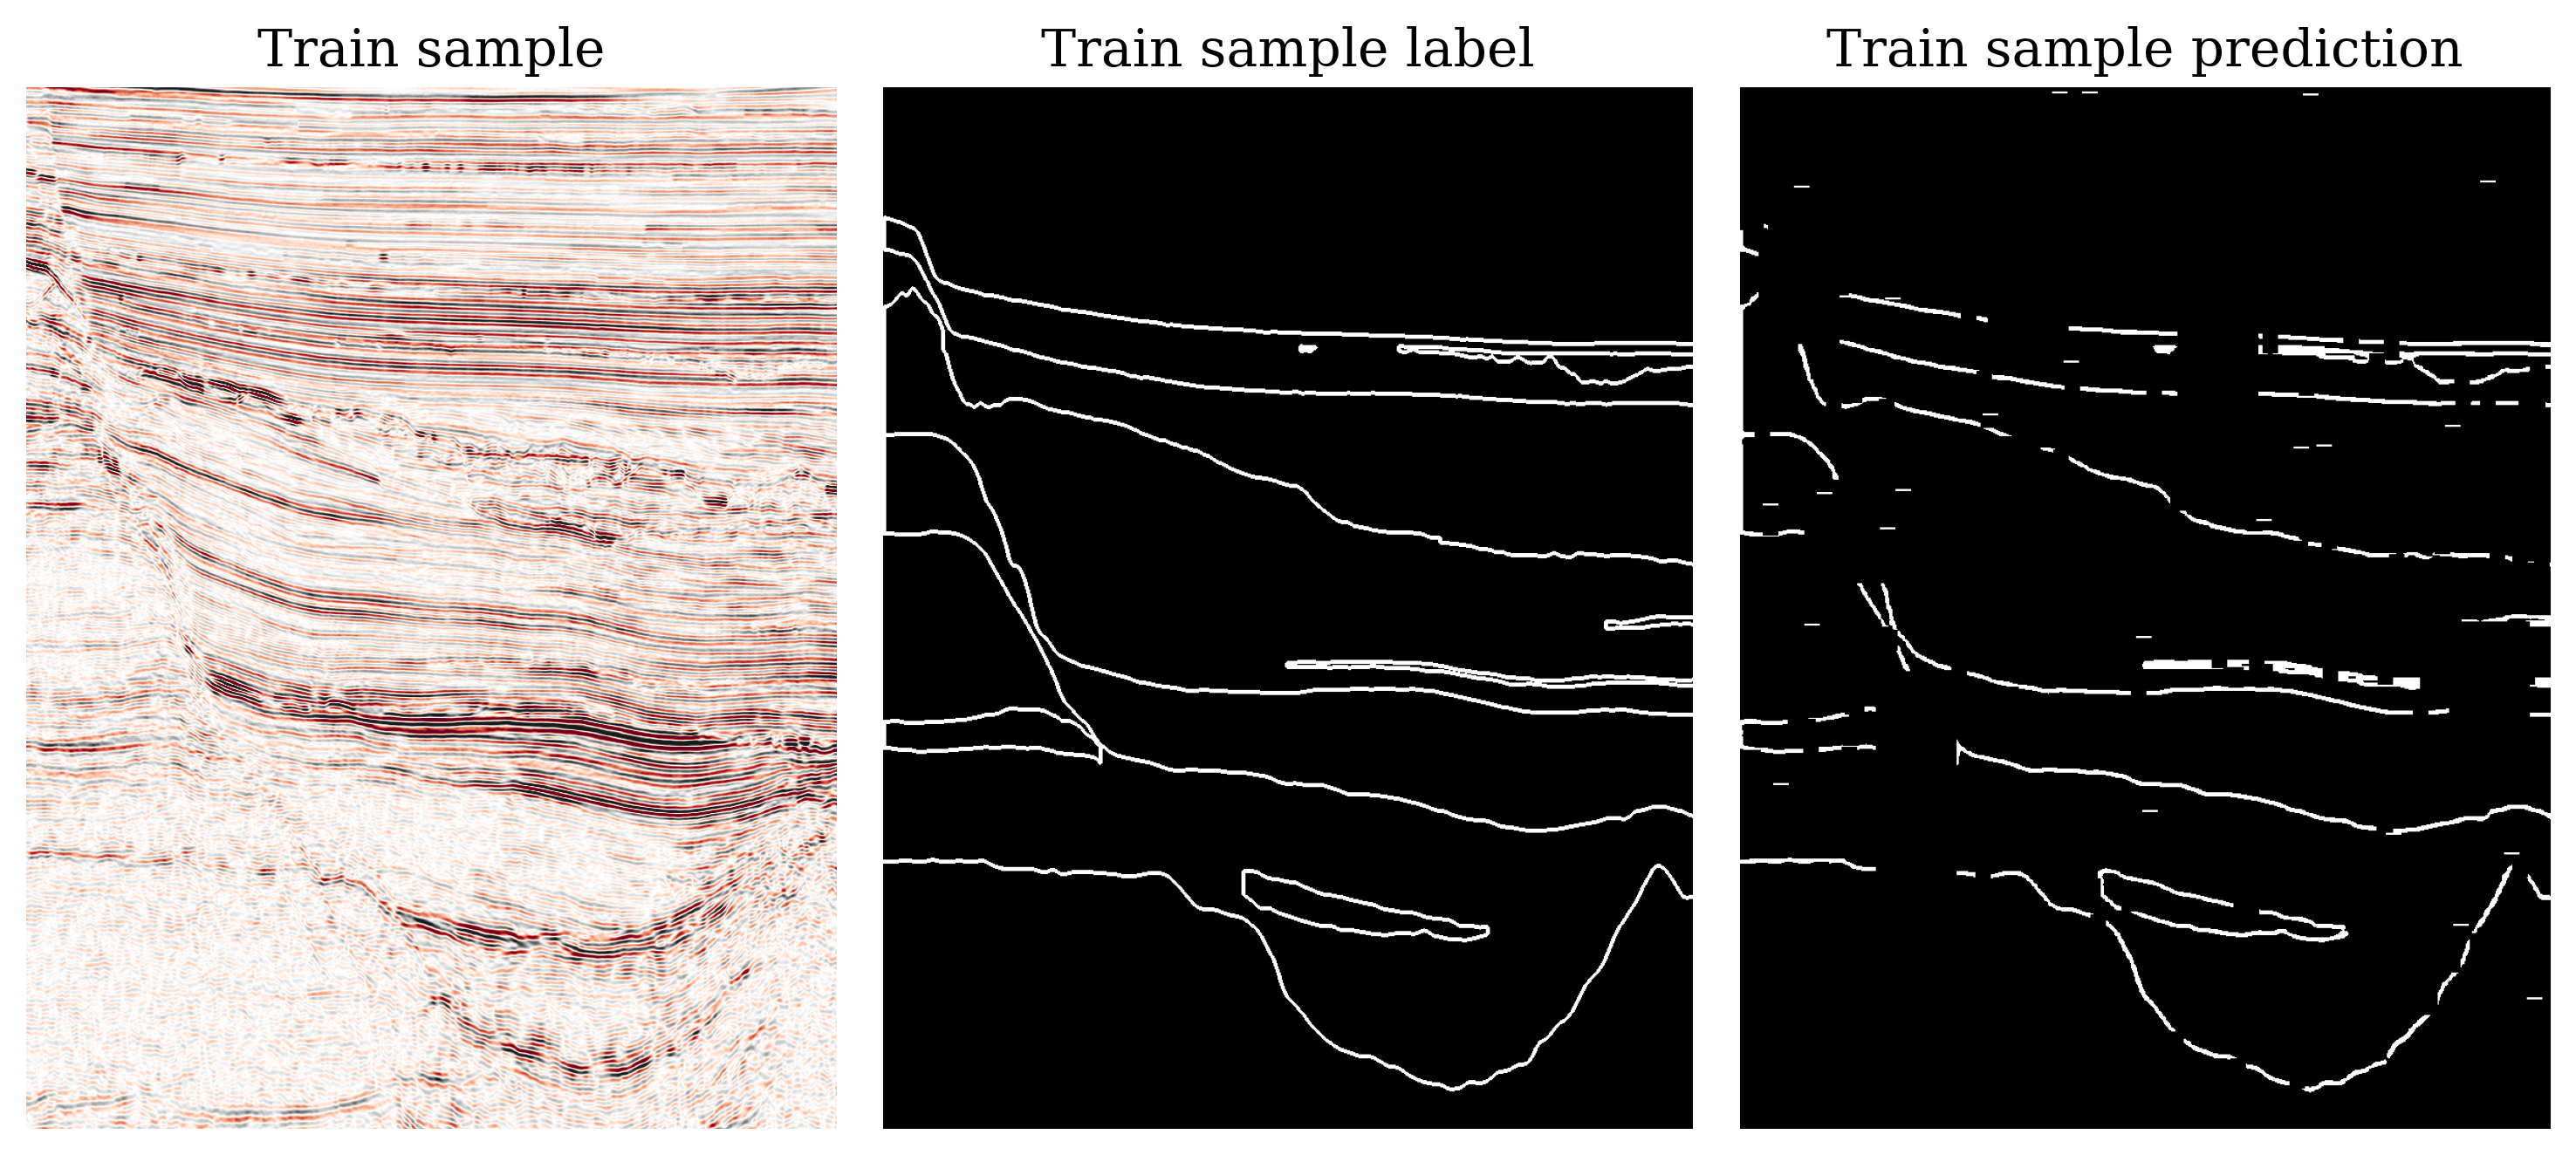

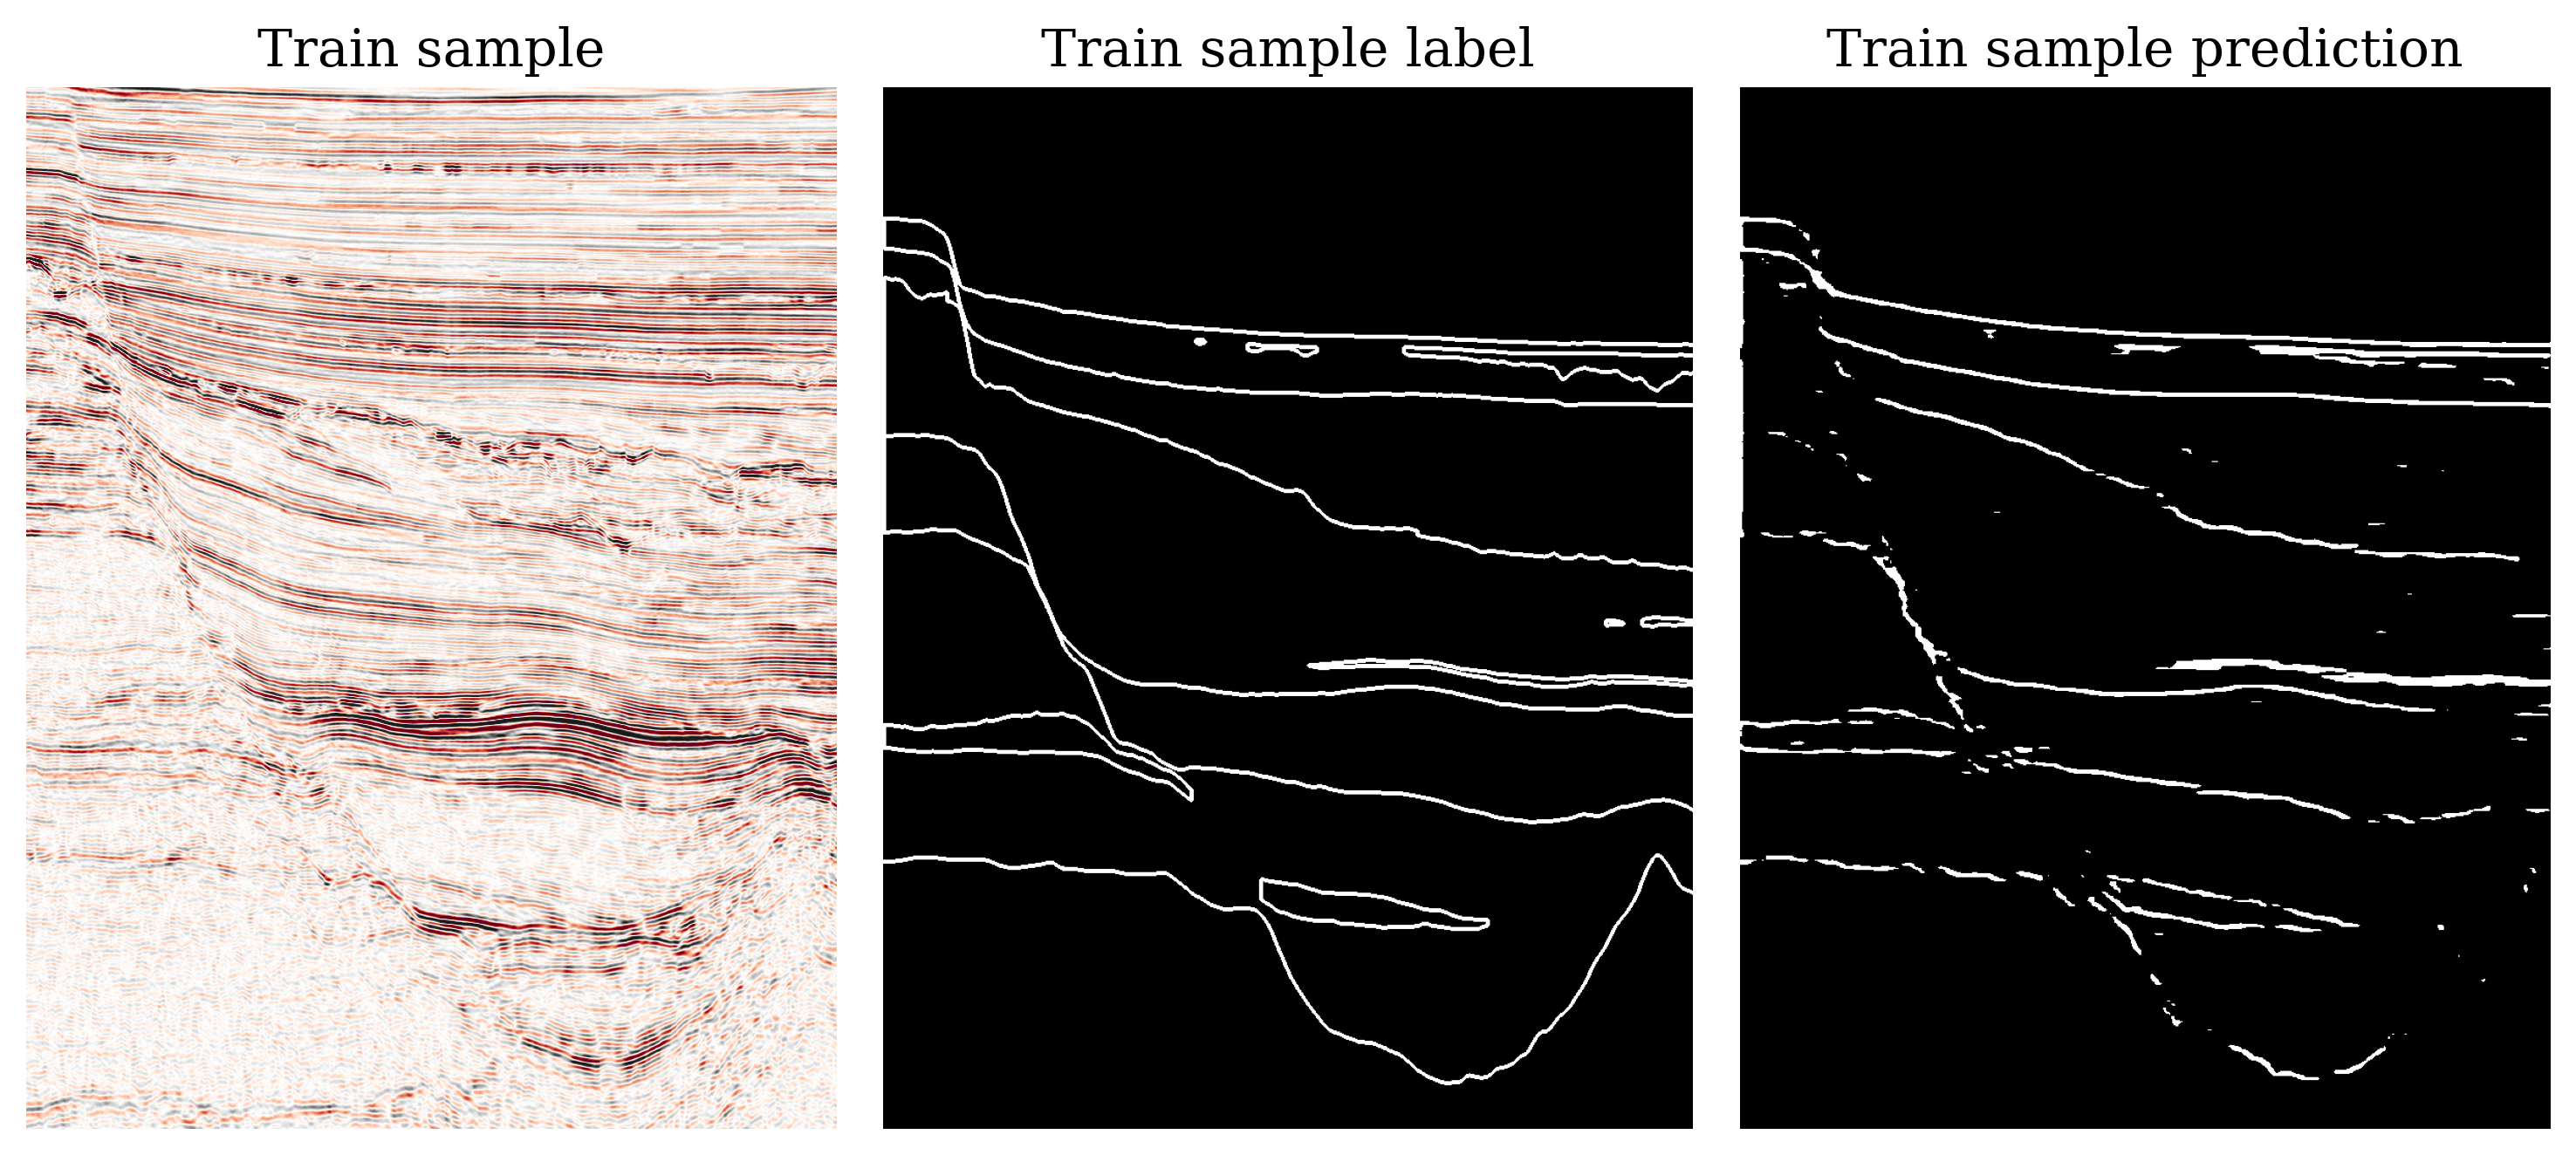

In [6]:
data_file = '/datasets/public_real_data/parihaka_dataset.npy'
label_file = '/datasets/public_real_data/parihaka_boundaries.npy'
prediction_file = '/datasets/models_predictions/parihaka_7d_boundaries_prediction.npy'

data = np.load(data_file, mmap_mode='r')
label_data = np.load(label_file, mmap_mode='r')
prediction_data = np.load(prediction_file, mmap_mode='r')

samples_train = [9, 51, 68, 80, 96, 107, 124, 136, 147, 172, 191, 206, 221, 235, 248, 258, 273, 285, 314, 336, 356, 385, 410, 428, 453, 474, 505, 528, 552, 579]
samples_val = [30, 59, 74, 88, 101, 115, 130, 141, 159, 181, 198, 213, 228, 241, 253, 265, 279, 299, 325, 346, 370, 397, 419, 440, 463, 489, 516, 540, 565] 

#for i in range(1, 520, 2):
for i, j in zip(samples_train, samples_val):
    if i == 336:
        section = data[i, :, :].T
        section2 = data[j, :, :].T
        section = data_standardization(section)
        section2 = data_standardization(section2)

        label_section = label_data[i, :, :].T
        label_section2 = label_data[j, :, :].T

        prediction_section = prediction_data[i, :, :].T
        prediction_section2 = prediction_data[j, :, :].T
        
        prediction_section_augmented = apply_augmentation(prediction_section)
        plot_steps(section, label_section, prediction_section_augmented)
        plot_steps(section2, label_section2, prediction_section2)